#**Preparation**

###Install Miniconda3 and RDKit

In [1]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2020-03-21 16:42:34--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6447c_0
    - conda==4.8.2=py37_0
    - cryptography==2.8=py37h1ba5d50_0
    - idna==2.8=py37_0
    - ld_impl_linux-64==2.33.1=h53a641e_7
    - libedit

###Install chembl_webresource_client

In [2]:
!pip install chembl_webresource_client

###Append rdkit path to current python system path

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')
from rdkit.Chem import PandasTools

###Import IPython helpers

In [4]:
%matplotlib inline
%pylab inline
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Populating the interactive namespace from numpy and matplotlib


###Import RDKit, Numpy, Pandas libraries

In [0]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit import DataStructs
import numpy as np
import pandas as pd
from time import time

###Install Open Babel

In [6]:
!sudo apt install openbabel pymol

Reading package lists... Done
Building dependency tree       
Reading state information... Done
openbabel is already the newest version (2.3.2+dfsg-3build1).
pymol is already the newest version (1.8.4.0+dfsg-1build1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


###Authorization Google Colab

In [7]:
from google.colab import drive, files
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#**Simple RDKit stuff - Molecules, descriptors and similarity**

Tutorial: https://github.com/chembl/mychembl/blob/master/ipython_notebooks/

###Molecule from SMILES

**Canonical** SMILES -> Each distinct chemical molecule has a single UNIQUE SMILES representation

**Isomeric** SMILES -> Support the specification of isotopes, chirality, and configuration of double bonds 

In [0]:
smi = 'CC(C)(C)OC(=O)Nc1cccn([C@@H](CC2CC2)C(=O)N[C@@H](C[C@@H]2CCNC2=O)[C@@H](O)C(=O)NCc2ccccc2)c1=O' #Isomeric SMILES (Simplified Molecular-input Line-Entry System) 
                                                                                                       #, PDB: 6Y2F
mol = Chem.MolFromSmiles(smi)

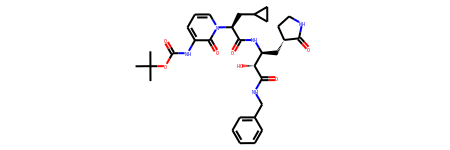

In [9]:
mol

###Simple descriptors

In [10]:
print(Descriptors.MolWt(mol))

595.6970000000003


In [11]:
print(Descriptors.RingCount(mol))

4


###Output to various text formats

In [12]:
Chem.MolToSmiles(mol, isomericSmiles=True) #Isomeric SMILES

'CC(C)(C)OC(=O)Nc1cccn([C@@H](CC2CC2)C(=O)N[C@@H](C[C@@H]2CCNC2=O)[C@@H](O)C(=O)NCc2ccccc2)c1=O'

In [13]:
Chem.MolToSmiles(mol, isomericSmiles=False) #Canonical SMILES

'CC(C)(C)OC(=O)Nc1cccn(C(CC2CC2)C(=O)NC(CC2CCNC2=O)C(O)C(=O)NCc2ccccc2)c1=O'

In [14]:
print(Chem.MolToInchi(mol))

InChI=1S/C31H41N5O7/c1-31(2,3)43-30(42)35-22-10-7-15-36(29(22)41)24(16-19-11-12-19)27(39)34-23(17-21-13-14-32-26(21)38)25(37)28(40)33-18-20-8-5-4-6-9-20/h4-10,15,19,21,23-25,37H,11-14,16-18H2,1-3H3,(H,32,38)(H,33,40)(H,34,39)(H,35,42)/t21-,23-,24-,25+/m0/s1


In [15]:
print(Chem.MolToSmarts(mol))

[#6]-[#6](-[#6])(-[#6])-[#8]-[#6](=[#8])-[#7]-[#6]1:[#6]:[#6]:[#6]:[#7](-[#6@@H](-[#6]-[#6]2-[#6]-[#6]-2)-[#6](=[#8])-[#7]-[#6@@H](-[#6]-[#6@@H]2-[#6]-[#6]-[#7]-[#6]-2=[#8])-[#6@@H](-[#8])-[#6](=[#8])-[#7]-[#6]-[#6]2:[#6]:[#6]:[#6]:[#6]:[#6]:2):[#6]:1=[#8]


In [0]:
sdf = Chem.MolToMolBlock(mol)

In [17]:
print(sdf)


     RDKit          2D

 43 46  0  0  0  0  0  0  0  0999 V2000
    7.2990   -1.8481    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.0000   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.7010   -3.3481    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.7500   -3.8971    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.2500   -1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000   -2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    2.5981    0

###Fingerprints and similarity

In [0]:
fp = Chem.GetMorganFingerprintAsBitVect(mol,2,nBits=2048)

In [19]:
fp.ToBitString()

'010000000000000000000000000001000000000000000000000000000000000000000100000000001000000000000001000000000000000000100100000000000000000000000000000000100000000000000010000000000000000000000000000001000000000000000000000000000001000100000000000000000000000100000000000000000000000000000000000000000000000001000000001000000000000000000000000000000000000000000000000000000000000000000000000001001000000000000000000000000000000000010000000000000000000000000000000000000000000000000000001000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000010000000000000000000000000000001000000000001000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000001000000000010000000100000000000000000000000000000000000000000000

In [20]:
fp.GetNumOnBits() # How many '1' in the string?

73

In [21]:
fp.GetNumBits() # Lenght of the string

2048

In [0]:
smi2 = 'CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@H](C)NC(=O)c1cc(C)on1)C(C)C)C(=O)N[C@@H](C[C@@H]2CCNC2=O)\C=C/C(=O)OCc3ccccc3' #PDB:6LU7
mol2 = Chem.MolFromSmiles(smi2)

In [0]:
fp2 = Chem.GetMorganFingerprintAsBitVect(mol2, 2, nBits=2048)

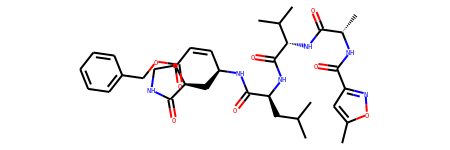

In [24]:
mol2

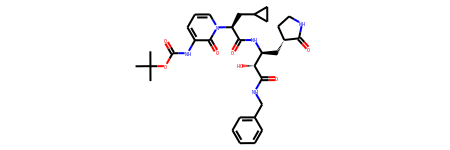

In [25]:
mol

In [26]:
DataStructs.TanimotoSimilarity(fp,fp2)

0.2809917355371901

Note: Tanimoto Similarity, 0 ≤ **J** ≤ 1

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/eaef5aa86949f49e7dc6b9c8c3dd8b233332c9e7)


###Similarity Maps

(<Figure size 180x180 with 1 Axes>, 0.10537634408602153)

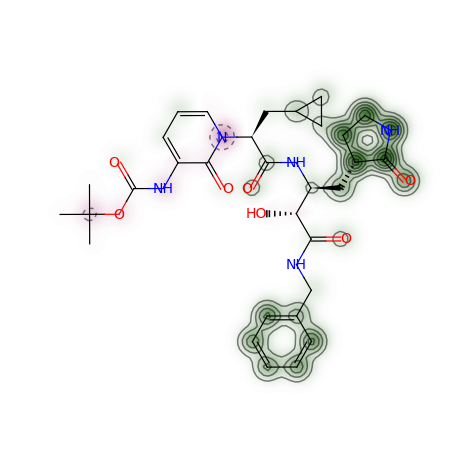

In [27]:
from rdkit.Chem.Draw import SimilarityMaps
SimilarityMaps.GetSimilarityMapForFingerprint(mol2, mol, SimilarityMaps.GetMorganFingerprint)

#**Using ChEMBL to find similarity**

Tutorial: https://github.com/chembl/chembl_webresource_client

###Find compounds similar to given SMILES query with similarity threshold of 40%

In [0]:
from chembl_webresource_client.new_client import *
similarity = new_client.similarity
res = similarity.filter(smiles="CC(C)(C)OC(=O)Nc1cccn(C(CC2CC2)C(=O)NC(CC2CCNC2=O)C(O)C(=O)NCc2ccccc2)c1=O", similarity=40)

In [0]:
df_res = pd.DataFrame(res)

In [30]:
df_res

,atc_classifications,availability_type,biotherapeutic,black_box_warning,chebi_par_id,chirality,cross_references,dosed_ingredient,first_approval,first_in_class,helm_notation,indication_class,inorganic_flag,max_phase,molecule_chembl_id,molecule_hierarchy,molecule_properties,molecule_structures,molecule_type,natural_product,oral,parenteral,polymer_flag,pref_name,prodrug,similarity,structure_type,therapeutic_flag,topical,usan_stem,usan_stem_definition,usan_substem,usan_year,withdrawn_class,withdrawn_country,withdrawn_flag,withdrawn_reason,withdrawn_year
0,[],-1,None,0,None,-1,[],False,None,-1,None,None,-1,0,CHEMBL2046784,"{'molecule_chembl_id': 'CHEMBL2046784', 'paren...","{'alogp': '2.02', 'aromatic_rings': 2, 'cx_log...",{'canonical_smiles': 'CC(C)C[C@H](NC(=O)OCc1cc...,Small molecule,-1,False,False,False,None,-1,52.27272510528564453125,MOL,False,False,None,None,None,None,None,None,False,None,None
1,[],-1,None,0,None,-1,[],False,None,-1,None,None,-1,0,CHEMBL297598,"{'molecule_chembl_id': 'CHEMBL297598', 'parent...","{'alogp': '3.51', 'aromatic_rings': 3, 'cx_log...",{'canonical_smiles': 'CCOC(=O)/C=C/[C@H](C[C@@...,Small molecule,-1,False,False,False,None,-1,51.5463888645172119140625,MOL,False,False,None,None,None,None,None,None,False,None,None
2,[],-1,None,0,None,-1,[],False,None,-1,None,None,-1,0,CHEMBL44022,"{'molecule_chembl_id': 'CHEMBL44022', 'parent_...","{'alogp': '3.51', 'aromatic_rings': 3, 'cx_log...",{'canonical_smiles': 'CCOC(=O)/C=C/[C@H](C[C@H...,Small molecule,-1,False,False,False,None,-1,51.5463888645172119140625,MOL,False,False,None,None,None,None,None,None,False,None,None
3,[],-1,None,0,None,-1,[],False,None,-1,None,None,-1,0,CHEMBL139953,"{'molecule_chembl_id': 'CHEMBL139953', 'parent...","{'alogp': '2.26', 'aromatic_rings': 2, 'cx_log...",{'canonical_smiles': 'CC[C@@H](C(=O)N[C@H](/C=...,Small molecule,-1,False,False,False,None,-1,47.572815418243408203125,MOL,False,False,None,None,None,None,None,None,False,None,None
4,[],-1,None,0,None,-1,[],False,None,-1,None,None,-1,0,CHEMBL2046785,"{'molecule_chembl_id': 'CHEMBL2046785', 'paren...","{'alogp': '1.61', 'aromatic_rings': 1, 'cx_log...",{'canonical_smiles': 'CC(C)C[C@H](NC(=O)OCc1cc...,Small molecule,-1,False,False,False,None,-1,46.7391312122344970703125,MOL,False,False,None,None,None,None,None,None,False,None,None
5,[],-1,None,0,None,-1,[],False,None,-1,None,None,-1,0,CHEMBL139782,"{'molecule_chembl_id': 'CHEMBL139782', 'parent...","{'alogp': '1.87', 'aromatic_rings': 2, 'cx_log...",{'canonical_smiles': 'C#CC[C@@H](C(=O)N[C@H](/...,Small molecule,-1,False,False,False,None,-1,46.22641503810882568359375,MOL,False,False,None,None,None,None,None,None,False,None,None
6,[],-1,None,0,None,-1,[],False,None,-1,None,None,-1,0,CHEMBL2046780,"{'molecule_chembl_id': 'CHEMBL2046780', 'paren...","{'alogp': '0.38', 'aromatic_rings': 1, 'cx_log...",{'canonical_smiles': 'CCOC(=O)CNC(=O)C(O)[C@H]...,Small molecule,-1,False,False,False,None,-1,45.83333432674407958984375,MOL,False,False,None,None,None,None,None,None,False,None,None
7,[],-1,None,0,None,-1,[],False,None,-1,None,None,-1,0,CHEMBL2047009,"{'molecule_chembl_id': 'CHEMBL2047009', 'paren...","{'alogp': '1.42', 'aromatic_rings': 2, 'cx_log...",{'canonical_smiles': 'CC(C)NC(=O)C(O)[C@H](CC1...,Small molecule,-1,False,False,False,None,-1,45.05494534969329833984375,MOL,False,False,None,None,None,None,None,None,False,None,None
8,[],-1,None,0,None,-1,[],False,None,-1,None,None,-1,0,CHEMBL345023,"{'molecule_chembl_id': 'CHEMBL345023', 'parent...","{'alogp': '2.66', 'aromatic_rings': 3, 'cx_log...",{'canonical_smiles': 'CC[C@@H](C(=O)N[C@H](/C=...,Small molecule,-1,False,False,False,None,-1,44.85981166362762451171875,MOL,False,False,None,None,None,None,None,None,False,None,None
9,[],-1,None,0,None,-1,[],False,None,-1,None,None,-1,0,CHEMBL2046778,"{'molecule_chembl_id': 'CHEMBL2046778', 'paren...","{'alogp': '1.62', 'aromatic_rings': 1, 'cx_log...",{'canonical_smiles': 'CCCCNC(=O)C(O)[C@H](CC1C...,Small molecule,-1,False,False,F

In [31]:
len(df_res)

48

### Compound data

In [0]:
compounds = new_client.molecule
cmpd_id_list = list(df_res['molecule_chembl_id'])
compound_list = compounds.filter(molecule_chembl_id__in = cmpd_id_list) \
                         .only('molecule_chembl_id','molecule_structures')

Change to DataFrame

In [33]:
compound_df = pd.DataFrame.from_records(compound_list)
compound_df = compound_df.drop_duplicates('molecule_chembl_id', keep = 'first')
print(compound_df.shape)

(48, 2)


In [34]:
compound_df

,molecule_chembl_id,molecule_structures
0,CHEMBL40872,{'canonical_smiles': 'CCOC(=O)/C=C/[C@H](CCC(N...
2,CHEMBL297598,{'canonical_smiles': 'CCOC(=O)/C=C/[C@H](C[C@@...
3,CHEMBL289920,{'canonical_smiles': 'CCOC(=O)/C=C/[C@H](C[C@@...
4,CHEMBL291276,{'canonical_smiles': 'Cc1cc(C(=O)Nc2cccn([C@@H...
5,CHEMBL44022,{'canonical_smiles': 'CCOC(=O)/C=C/[C@H](C[C@H...
6,CHEMBL139782,{'canonical_smiles': 'C#CC[C@@H](C(=O)N[C@H](/...
7,CHEMBL345023,{'canonical_smiles': 'CC[C@@H](C(=O)N[C@H](/C=...
8,CHEMBL139662,{'canonical_smiles': 'C#CC[C@@H](C(=O)N[C@H](/...
9,CHEMBL343497,{'canonical_smiles': 'C#CC[C@@H](C(=O)N[C@H](/...
10,CHEMBL342122,{'canonical_smiles': 'CC[C@@H](C(=O)N[C@H](/C=...


In [35]:
for i, cmpd in compound_df.iterrows():
    if compound_df.loc[i]['molecule_structures'] != None:
        compound_df.loc[i]['molecule_structures'] = cmpd['molecule_structures']['canonical_smiles']

print (compound_df.shape)

(48, 2)


In [36]:
compound_df.head()

,molecule_chembl_id,molecule_structures
0,CHEMBL40872,CCOC(=O)/C=C/[C@H](CCC(N)=O)NC(=O)[C@H](CC1CCC...
2,CHEMBL297598,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...
3,CHEMBL289920,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...
4,CHEMBL291276,Cc1cc(C(=O)Nc2cccn([C@@H](Cc3ccc(F)c(F)c3)C(=O...
5,CHEMBL44022,CCOC(=O)/C=C/[C@H](C[C@H]1CCNC1=O)NC(=O)[C@H](...


### Prepare output data

In [37]:
output_df = compound_df.rename(columns= {'molecule_structures':'smiles'})
output_df.shape
output_df.head()

(48, 2)

,molecule_chembl_id,smiles
0,CHEMBL40872,CCOC(=O)/C=C/[C@H](CCC(N)=O)NC(=O)[C@H](CC1CCC...
2,CHEMBL297598,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...
3,CHEMBL289920,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...
4,CHEMBL291276,Cc1cc(C(=O)Nc2cccn([C@@H](Cc3ccc(F)c(F)c3)C(=O...
5,CHEMBL44022,CCOC(=O)/C=C/[C@H](C[C@H]1CCNC1=O)NC(=O)[C@H](...


In [0]:
PandasTools.AddMoleculeColumnToFrame(output_df, smilesCol='smiles')

,molecule_chembl_id,smiles,ROMol
0,CHEMBL40872,CCOC(=O)/C=C/[C@H](CCC(N)=O)NC(=O)[C@H](CC1CCC...,
2,CHEMBL297598,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,
3,CHEMBL289920,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,
4,CHEMBL291276,Cc1cc(C(=O)Nc2cccn([C@@H](Cc3ccc(F)c(F)c3)C(=O...,
5,CHEMBL44022,CCOC(=O)/C=C/[C@H](C[C@H]1CCNC1=O)NC(=O)[C@H](...,
6,CHEMBL139782,C#CC[C@@H](C(=O)N[C@H](/C=C/C(=O)OC(C)(C)C)C[C...,
7,CHEMBL345023,CC[C@@H](C(=O)N[C@H](/C=C/C(=O)OCc1ccccc1)C[C@...,
8,CHEMBL139662,C#CC[C@@H](C(=O)N[C@H](/C=C/C(=O)OCC(C)(C)C)C[...,
9,CHEMBL343497,C#CC[C@@H](C(=O)N[C@H](/C=C/C(=O)OC(C)C)C[C@@H...,
10,CHEMBL342122,CC[C@@H](C(=O)N[C@H](/C=C/C(=O)OC(C)C)C[C@@H]1...,

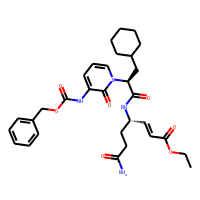
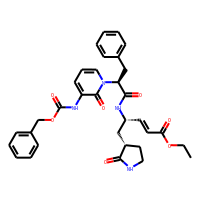
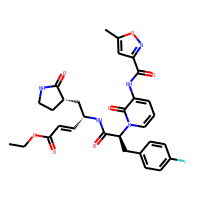
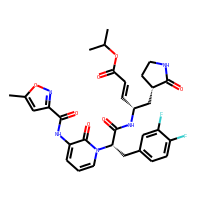
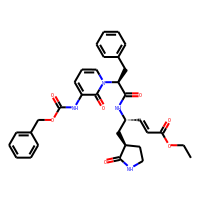
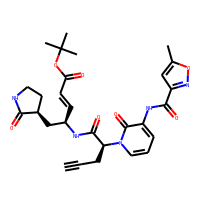
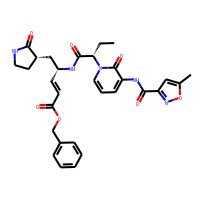
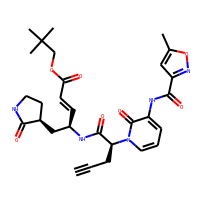
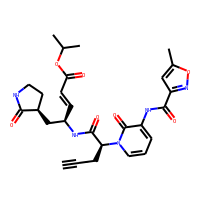
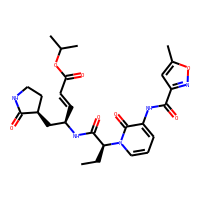
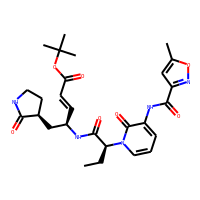
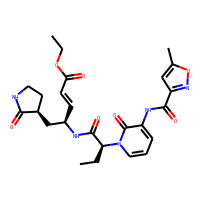
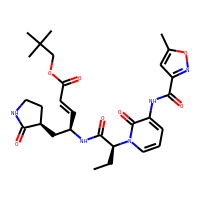
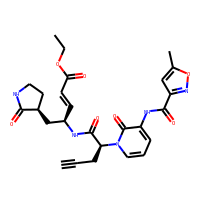
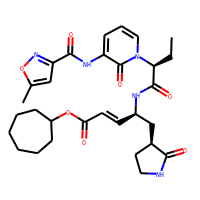
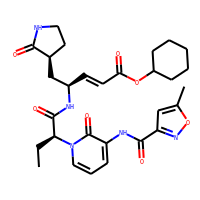
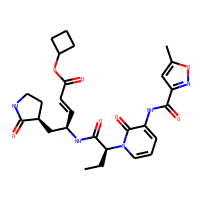
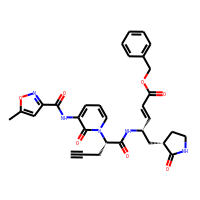
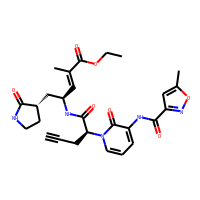
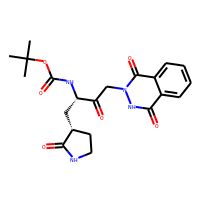
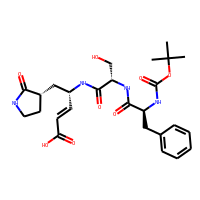
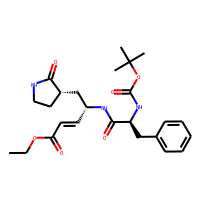
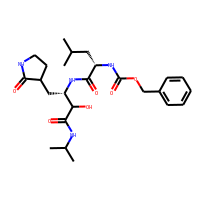
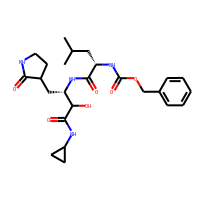
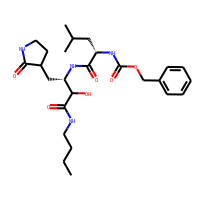
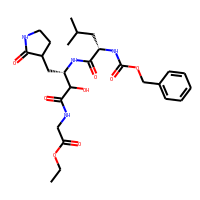
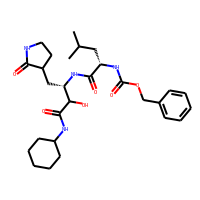
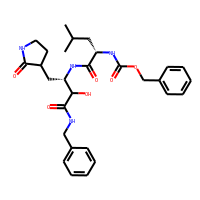
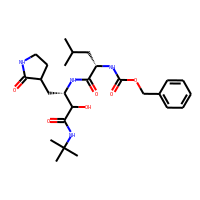
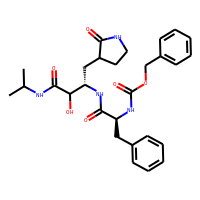
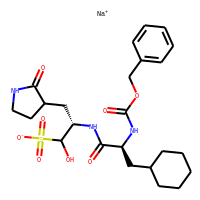
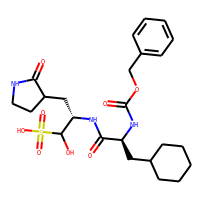
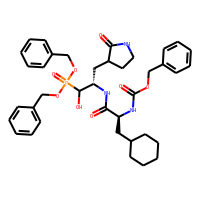
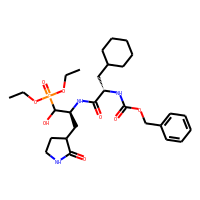
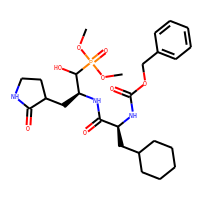
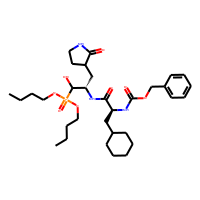
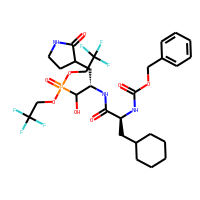
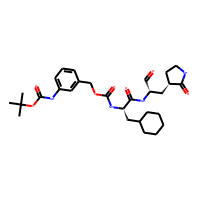
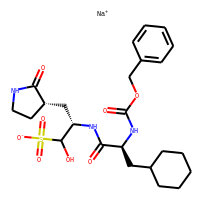
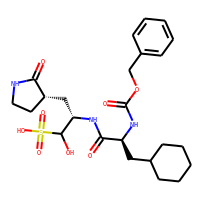
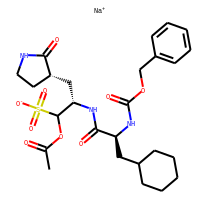
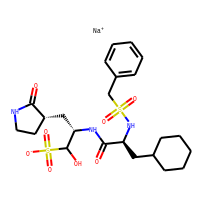
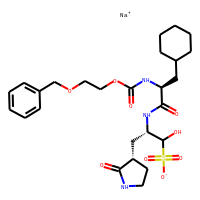
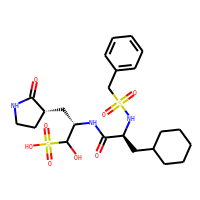
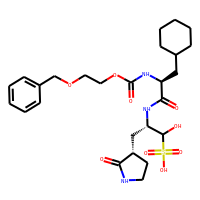
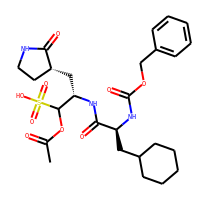
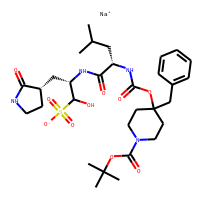
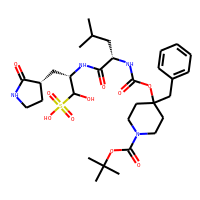

In [39]:
output_df

In [40]:
drive.mount('/content/gdrive/')
output_df.drop("ROMol", axis=1).to_csv('/content/gdrive/My Drive/Colab Notebooks/vittamin/cov_compounds.csv')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
smi = output_df.drop(output_df.columns[[0, 2]], axis=1)

In [42]:
smi

,smiles
0,CCOC(=O)/C=C/[C@H](CCC(N)=O)NC(=O)[C@H](CC1CCC...
2,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...
3,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...
4,Cc1cc(C(=O)Nc2cccn([C@@H](Cc3ccc(F)c(F)c3)C(=O...
5,CCOC(=O)/C=C/[C@H](C[C@H]1CCNC1=O)NC(=O)[C@H](...
6,C#CC[C@@H](C(=O)N[C@H](/C=C/C(=O)OC(C)(C)C)C[C...
7,CC[C@@H](C(=O)N[C@H](/C=C/C(=O)OCc1ccccc1)C[C@...
8,C#CC[C@@H](C(=O)N[C@H](/C=C/C(=O)OCC(C)(C)C)C[...
9,C#CC[C@@H](C(=O)N[C@H](/C=C/C(=O)OC(C)C)C[C@@H...
10,CC[C@@H](C(=O)N[C@H](/C=C/C(=O)OC(C)C)C[C@@H]1...


In [0]:
smistr = ''
for i in range(smi.values.size):
  smistr = smistr+smi.values[i][0]+'\n'

In [44]:
print(smistr)

CCOC(=O)/C=C/[C@H](CCC(N)=O)NC(=O)[C@H](CC1CCCCC1)n1cccc(NC(=O)OCc2ccccc2)c1=O
CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H](Cc1ccccc1)n1cccc(NC(=O)OCc2ccccc2)c1=O
CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H](Cc1ccc(F)cc1)n1cccc(NC(=O)c2cc(C)on2)c1=O
Cc1cc(C(=O)Nc2cccn([C@@H](Cc3ccc(F)c(F)c3)C(=O)N[C@H](/C=C/C(=O)OC(C)C)C[C@@H]3CCNC3=O)c2=O)no1
CCOC(=O)/C=C/[C@H](C[C@H]1CCNC1=O)NC(=O)[C@H](Cc1ccccc1)n1cccc(NC(=O)OCc2ccccc2)c1=O
C#CC[C@@H](C(=O)N[C@H](/C=C/C(=O)OC(C)(C)C)C[C@@H]1CCNC1=O)n1cccc(NC(=O)c2cc(C)on2)c1=O
CC[C@@H](C(=O)N[C@H](/C=C/C(=O)OCc1ccccc1)C[C@@H]1CCNC1=O)n1cccc(NC(=O)c2cc(C)on2)c1=O
C#CC[C@@H](C(=O)N[C@H](/C=C/C(=O)OCC(C)(C)C)C[C@@H]1CCNC1=O)n1cccc(NC(=O)c2cc(C)on2)c1=O
C#CC[C@@H](C(=O)N[C@H](/C=C/C(=O)OC(C)C)C[C@@H]1CCNC1=O)n1cccc(NC(=O)c2cc(C)on2)c1=O
CC[C@@H](C(=O)N[C@H](/C=C/C(=O)OC(C)C)C[C@@H]1CCNC1=O)n1cccc(NC(=O)c2cc(C)on2)c1=O
CC[C@@H](C(=O)N[C@H](/C=C/C(=O)OC(C)(C)C)C[C@@H]1CCNC1=O)n1cccc(NC(=O)c2cc(C)on2)c1=O
CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H](

In [0]:
!echo '$smistr' > /content/gdrive/My\ Drive/Colab\ Notebooks/vittamin/cov_compounds.smi

In [57]:
!obabel /content/gdrive/My\ Drive/Colab\ Notebooks/vittamin/cov_compounds.smi --gen3d -omol2 -O /content/gdrive/My\ Drive/Colab\ Notebooks/vittamin/cov_compounds.mol2

48 molecules converted


#**Visualize compounds**

,molecule_chembl_id,smiles,ROMol,logp,mw
0,CHEMBL40872,CCOC(=O)/C=C/[C@H](CCC(N)=O)NC(=O)[C@H](CC1CCC...,,3.97810,580.682
2,CHEMBL297598,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,,3.51110,600.672
3,CHEMBL289920,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,,2.45022,593.612
4,CHEMBL291276,Cc1cc(C(=O)Nc2cccn([C@@H](Cc3ccc(F)c(F)c3)C(=O...,,2.97782,625.629
5,CHEMBL44022,CCOC(=O)/C=C/[C@H](C[C@H]1CCNC1=O)NC(=O)[C@H](...,,3.51110,600.672

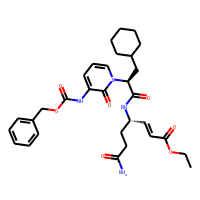
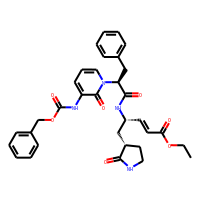
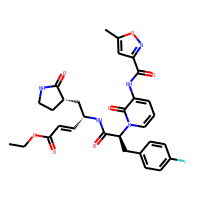
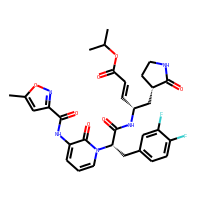
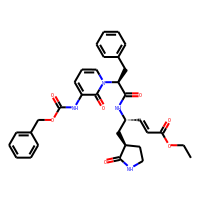

In [50]:
output_df.head()

In [0]:
output_df['logp'] = output_df['ROMol'].map(Descriptors.MolLogP)
output_df['mw'] = output_df['ROMol'].map(Descriptors.MolWt)

,molecule_chembl_id,smiles,ROMol,logp,mw
0,CHEMBL40872,CCOC(=O)/C=C/[C@H](CCC(N)=O)NC(=O)[C@H](CC1CCC...,,3.97810,580.682
2,CHEMBL297598,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,,3.51110,600.672
3,CHEMBL289920,CCOC(=O)/C=C/[C@H](C[C@@H]1CCNC1=O)NC(=O)[C@H]...,,2.45022,593.612
4,CHEMBL291276,Cc1cc(C(=O)Nc2cccn([C@@H](Cc3ccc(F)c(F)c3)C(=O...,,2.97782,625.629
5,CHEMBL44022,CCOC(=O)/C=C/[C@H](C[C@H]1CCNC1=O)NC(=O)[C@H](...,,3.51110,600.672

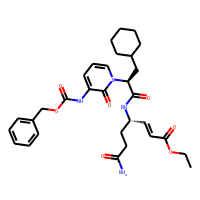
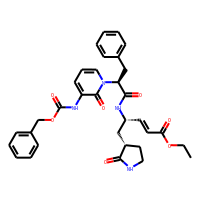
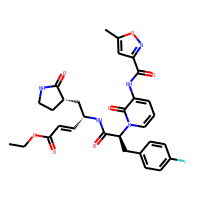
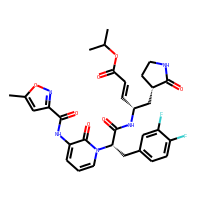
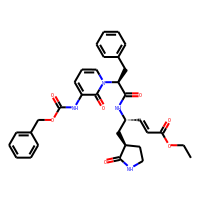

In [51]:
output_df.head()

In [53]:
output_df[['mw', 'logp']].describe()

,mw,logp
count,48.000000,48.000000
mean,560.924792,1.797363
std,54.531193,1.827221
min,430.461000,-2.676400
25%,529.894000,1.190930
50%,552.596500,1.940670
75%,582.656750,2.691845
max,705.789000,6.207900


In [0]:
rcParams['figure.figsize'] = 12,12

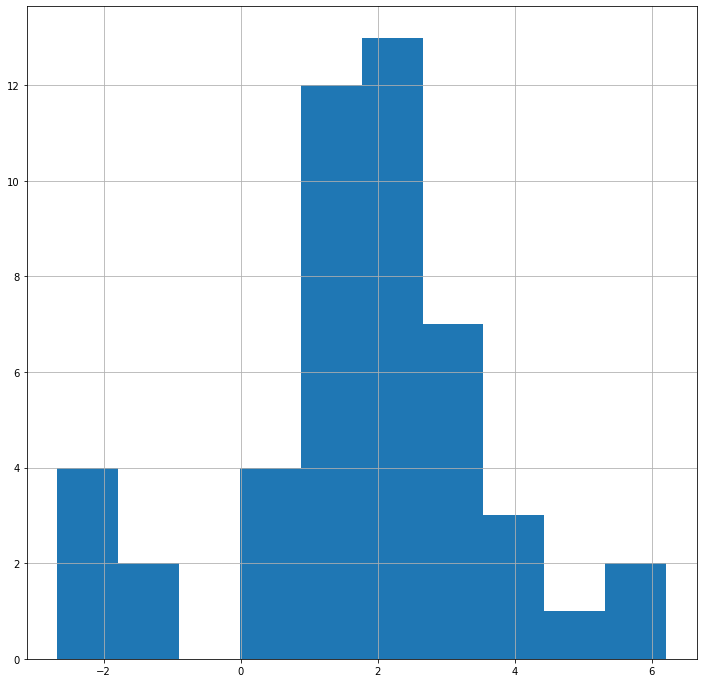

In [55]:
output_df['logp'].hist()

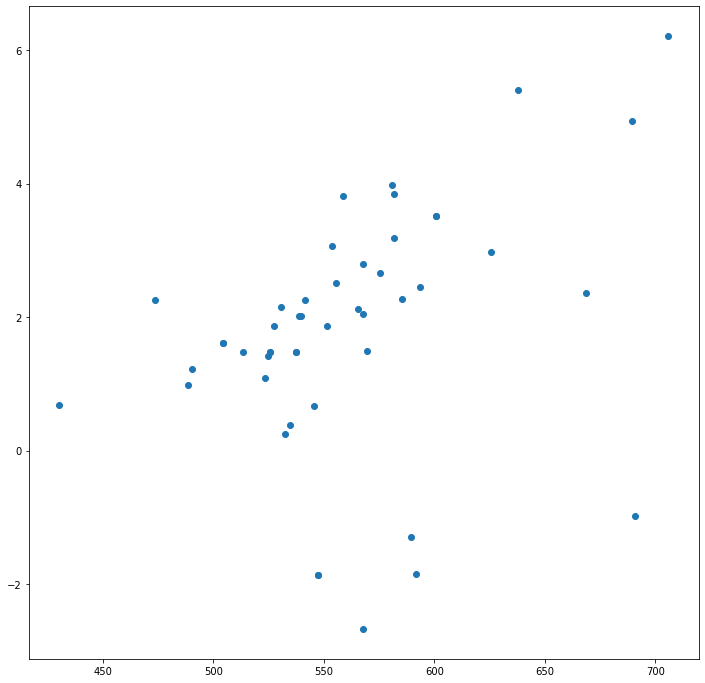

In [56]:
scatter(output_df['mw'],output_df['logp'])